<a href="https://colab.research.google.com/github/toby766/Admission-Prediction/blob/main/Admission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# load the data
df = pd.read_csv("/content/drive/MyDrive/Admission_Predict.csv")

In [2]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
# find the number of missing values in each column
null_counts = df.isnull().sum()

# print the number of missing values for each column
print(null_counts)


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [4]:
print(df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


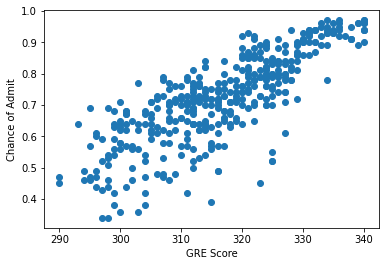

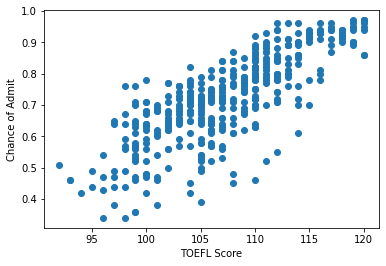

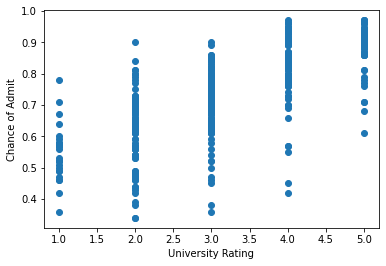

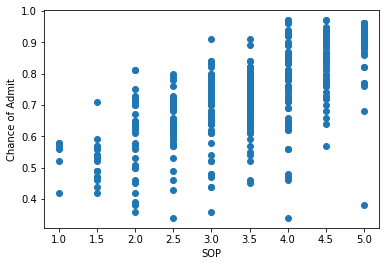

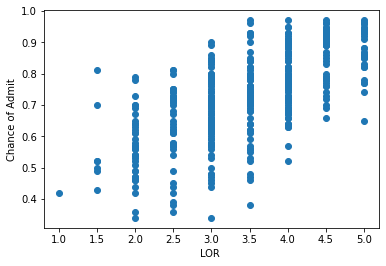

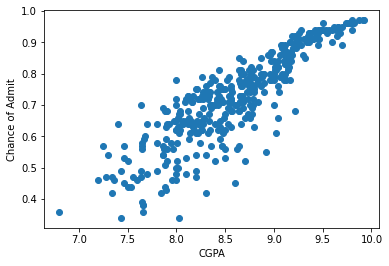

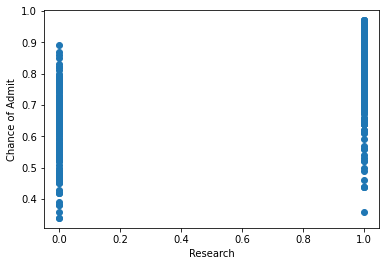

In [5]:
for col in df.drop('Serial No.', axis =1).columns:
    if col != "Chance of Admit ":
        plt.scatter(df[col], df["Chance of Admit "])
        plt.xlabel(col)
        plt.ylabel("Chance of Admit")
        plt.show()

In [6]:
# split the data into training and test sets
X = df.drop(columns=["Chance of Admit "])
y = df["Chance of Admit "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# preprocessing steps
from sklearn.preprocessing import OneHotEncoder
numeric_features = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA"]
categorical_features = ["Research"]
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [8]:
# create the model
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("regressor", LinearRegression())])

In [9]:
# train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['GRE Score', 'TOEFL Score',
                                                   'University Rating', 'SOP',
                                                   'LOR ', 'CGPA']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Research'])])),
                ('regressor', LinearRegression())])

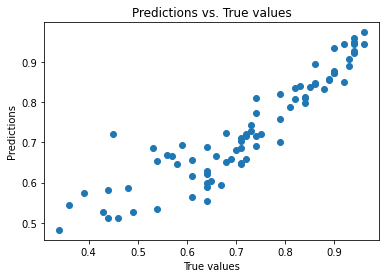

In [10]:
# make predictions on the test set
y_pred = model.predict(X_test)
# plot the predictions against the true values
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.title("Predictions vs. True values")
plt.show()

In [11]:
# evaluate the model
accuracy = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Mean absolute error:", mae)
print("Mean squared error:", mse)
print("R2 score:", r2)


Accuracy: 0.821208259148699
Mean absolute error: 0.04795673362091201
Mean squared error: 0.004617003377285015
R2 score: 0.821208259148699


In [12]:
input_data = {"GRE Score": 315,
              "TOEFL Score": 110,
              "University Rating": 4,
              "SOP": 4, 
              "LOR ": 4,
              "CGPA": 9,
              "Research": 0}

# convert the dictionary to a pandas DataFrame
input_df = pd.DataFrame(input_data, index=[0])

# make a prediction using the trained model
prediction = model.predict(input_df)[0]

print("Chance of admit:", prediction)

Chance of admit: 0.7795046096474598
